# Perceptron
A perceptron is a single layer neural network used in binary classification. It has four parts: input values (layer), weights and bias, net sum, activation.<br><br>
You feed the features of a data point into the input layer, each connection from the feature node to the output node has a weight associated with it. You multiply the input value by the weight and then add the bias term to compute the weighted sum. Then you feed that sum as an input for some activation function. The activation functions are used to map the input between the required values to either (0 or 1) or (-1 or 1) depending on the function used. 
<br><br>
To train a perceptron you have to update the weights. You update the weights based on the difference between the output and the expected output multiplied by the learning rate.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\Daman\Python\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [2]:
y_pred

array([1])

C:\Users\Daman\Python\envs\tensorflow-gpu\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


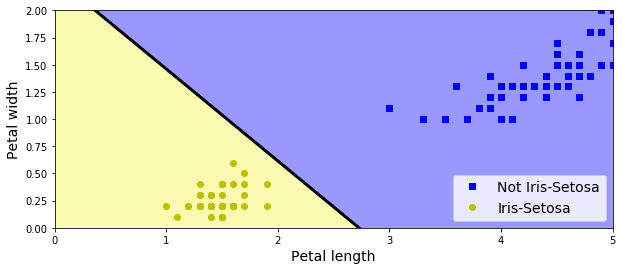

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)


plt.show()

# MLPs

The perceptron class resembles the SGDClassifier class, and they actually implement one another. Logistic Regression classifiers ouput a probability, Perceptrons to not. They make a predicition based on a hard threshold. One of the areas perceptrons fail at is the XOR Problem. However, this can easily become overcome by using Multiple Layer Perceptrons. <Br> <br>

Backpropagation is a training algorithm for MLPs. It works basically like Gradient Descent using an autodifferential mode to compute the gradients. 
<br> <br>
For each training instance, the algorithm feeds it to the network and computes the output of every neuron in each consecutive layer. Then it measures the network's output error, and computes how much each neuron in the last hidden layer contributed to each output neuron's error. It then proceeds to measure how much of these error contributions came from each neuron in the previous hidden layer. 

# Activation Functions
The regular perceptron class uses a step function (a piecewise function) as it's activation function. But to compute the gradients you need non-infinite slopes. So common activation functions include the sigmoid function, the hyperbolic tangent function, and the ReLU function. 

In [4]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

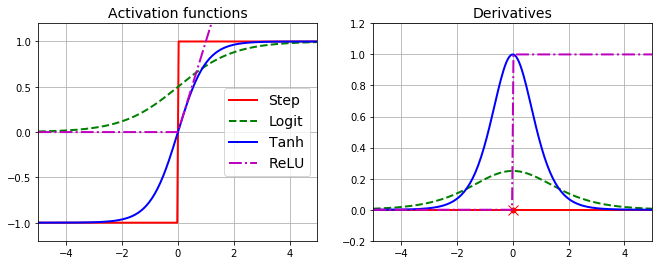

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [6]:

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

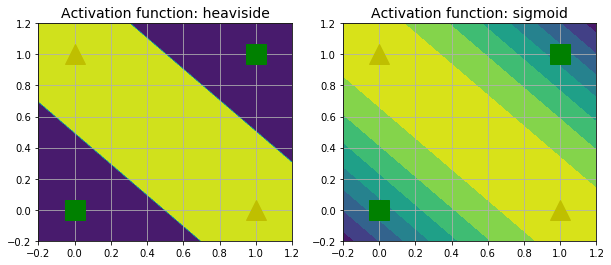

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")

C:\Users\Daman\Python\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:

import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002B1DC021438>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Daman\\AppData\\Local\\Temp\\tmp1w_tnmg2'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Daman\AppData\Local\Temp\tmp1w_tnmg2\model.ckpt.
INFO:tensorflow:loss = 2.4005778, step = 1
INFO:tensorflow:global_step/sec: 371.269
INFO:tensorflow:loss = 0.3126759, step = 101 (0.271 sec)
INFO:tensorflow:global_step/sec: 37

INFO:tensorflow:loss = 0.0102008525, step = 7301 (0.275 sec)
INFO:tensorflow:global_step/sec: 383.586
INFO:tensorflow:loss = 0.022972539, step = 7401 (0.261 sec)
INFO:tensorflow:global_step/sec: 389.032
INFO:tensorflow:loss = 0.008069299, step = 7501 (0.257 sec)
INFO:tensorflow:global_step/sec: 371.808
INFO:tensorflow:loss = 0.012776822, step = 7601 (0.269 sec)
INFO:tensorflow:global_step/sec: 364.606
INFO:tensorflow:loss = 0.008342943, step = 7701 (0.274 sec)
INFO:tensorflow:global_step/sec: 383.482
INFO:tensorflow:loss = 0.004995003, step = 7801 (0.261 sec)
INFO:tensorflow:global_step/sec: 387.502
INFO:tensorflow:loss = 0.007154854, step = 7901 (0.258 sec)
INFO:tensorflow:global_step/sec: 398.404
INFO:tensorflow:loss = 0.0022156672, step = 8001 (0.254 sec)
INFO:tensorflow:global_step/sec: 316.764
INFO:tensorflow:loss = 0.005920576, step = 8101 (0.313 sec)
INFO:tensorflow:global_step/sec: 336.989
INFO:tensorflow:loss = 0.04043294, step = 8201 (0.297 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 386.321
INFO:tensorflow:loss = 0.002586105, step = 15401 (0.259 sec)
INFO:tensorflow:global_step/sec: 374.885
INFO:tensorflow:loss = 0.0054158126, step = 15501 (0.267 sec)
INFO:tensorflow:global_step/sec: 395.512
INFO:tensorflow:loss = 0.0030877278, step = 15601 (0.252 sec)
INFO:tensorflow:global_step/sec: 398.326
INFO:tensorflow:loss = 0.0059602745, step = 15701 (0.252 sec)
INFO:tensorflow:global_step/sec: 391.402
INFO:tensorflow:loss = 0.0010053914, step = 15801 (0.255 sec)
INFO:tensorflow:global_step/sec: 377.22
INFO:tensorflow:loss = 0.0008274447, step = 15901 (0.265 sec)
INFO:tensorflow:global_step/sec: 347.339
INFO:tensorflow:loss = 0.006181743, step = 16001 (0.288 sec)
INFO:tensorflow:global_step/sec: 378.873
INFO:tensorflow:loss = 0.0027693508, step = 16101 (0.263 sec)
INFO:tensorflow:global_step/sec: 377.282
INFO:tensorflow:loss = 0.00015505707, step = 16201 (0.266 sec)
INFO:tensorflow:global_step/sec: 386.519
INFO:tensorflow:loss = 0.002240286

INFO:tensorflow:global_step/sec: 400.713
INFO:tensorflow:loss = 0.00060415245, step = 23401 (0.249 sec)
INFO:tensorflow:global_step/sec: 371.181
INFO:tensorflow:loss = 0.0007343365, step = 23501 (0.269 sec)
INFO:tensorflow:global_step/sec: 395.975
INFO:tensorflow:loss = 0.00054571684, step = 23601 (0.253 sec)
INFO:tensorflow:global_step/sec: 392.253
INFO:tensorflow:loss = 0.000106172774, step = 23701 (0.254 sec)
INFO:tensorflow:global_step/sec: 366.044
INFO:tensorflow:loss = 0.0007724902, step = 23801 (0.273 sec)
INFO:tensorflow:global_step/sec: 378.295
INFO:tensorflow:loss = 0.0020515851, step = 23901 (0.265 sec)
INFO:tensorflow:global_step/sec: 373.468
INFO:tensorflow:loss = 0.0013182542, step = 24001 (0.267 sec)
INFO:tensorflow:global_step/sec: 372.557
INFO:tensorflow:loss = 0.0007521222, step = 24101 (0.268 sec)
INFO:tensorflow:global_step/sec: 375.884
INFO:tensorflow:loss = 0.001759388, step = 24201 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.626
INFO:tensorflow:loss = 0.0002

INFO:tensorflow:global_step/sec: 311.322
INFO:tensorflow:loss = 0.001330287, step = 31401 (0.321 sec)
INFO:tensorflow:global_step/sec: 368.993
INFO:tensorflow:loss = 0.00015440103, step = 31501 (0.271 sec)
INFO:tensorflow:global_step/sec: 360.514
INFO:tensorflow:loss = 0.00033513762, step = 31601 (0.277 sec)
INFO:tensorflow:global_step/sec: 369.26
INFO:tensorflow:loss = 0.00061940623, step = 31701 (0.271 sec)
INFO:tensorflow:global_step/sec: 309.41
INFO:tensorflow:loss = 0.00015122711, step = 31801 (0.326 sec)
INFO:tensorflow:global_step/sec: 322.916
INFO:tensorflow:loss = 0.00071113487, step = 31901 (0.308 sec)
INFO:tensorflow:global_step/sec: 353.05
INFO:tensorflow:loss = 0.00013390901, step = 32001 (0.283 sec)
INFO:tensorflow:global_step/sec: 368.978
INFO:tensorflow:loss = 0.00040288168, step = 32101 (0.272 sec)
INFO:tensorflow:global_step/sec: 365.811
INFO:tensorflow:loss = 0.0011117863, step = 32201 (0.272 sec)
INFO:tensorflow:global_step/sec: 398.194
INFO:tensorflow:loss = 0.0005

INFO:tensorflow:loss = 0.0004145004, step = 39301 (0.267 sec)
INFO:tensorflow:global_step/sec: 391.127
INFO:tensorflow:loss = 0.00044718102, step = 39401 (0.256 sec)
INFO:tensorflow:global_step/sec: 392.328
INFO:tensorflow:loss = 0.0001695534, step = 39501 (0.255 sec)
INFO:tensorflow:global_step/sec: 369.448
INFO:tensorflow:loss = 0.00066161714, step = 39601 (0.271 sec)
INFO:tensorflow:global_step/sec: 379.958
INFO:tensorflow:loss = 0.0001757507, step = 39701 (0.263 sec)
INFO:tensorflow:global_step/sec: 378.463
INFO:tensorflow:loss = 0.0010264525, step = 39801 (0.265 sec)
INFO:tensorflow:global_step/sec: 387.832
INFO:tensorflow:loss = 0.00078053726, step = 39901 (0.257 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\Daman\AppData\Local\Temp\tmp1w_tnmg2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00039578788.


SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\Daman\AppData\Local\Temp\tmp1w_tnmg2\model.ckpt-40000


0.9838

# Create model from scratch

In [13]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [15]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [16]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [17]:
#Method 2 of creating the layers
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [18]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [19]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.9 Val accuracy: 0.902
1 Train accuracy: 0.88 Val accuracy: 0.9222
2 Train accuracy: 0.9 Val accuracy: 0.9314
3 Train accuracy: 0.92 Val accuracy: 0.9376
4 Train accuracy: 0.92 Val accuracy: 0.945
5 Train accuracy: 0.94 Val accuracy: 0.9496
6 Train accuracy: 0.96 Val accuracy: 0.954
7 Train accuracy: 0.94 Val accuracy: 0.9576
8 Train accuracy: 0.96 Val accuracy: 0.9598
9 Train accuracy: 0.96 Val accuracy: 0.9612
10 Train accuracy: 0.96 Val accuracy: 0.9632
11 Train accuracy: 0.92 Val accuracy: 0.9668
12 Train accuracy: 0.98 Val accuracy: 0.9686
13 Train accuracy: 0.96 Val accuracy: 0.9676
14 Train accuracy: 1.0 Val accuracy: 0.9718
15 Train accuracy: 1.0 Val accuracy: 0.971
16 Train accuracy: 1.0 Val accuracy: 0.9714
17 Train accuracy: 0.94 Val accuracy: 0.9726
18 Train accuracy: 1.0 Val accuracy: 0.9738
19 Train accuracy: 1.0 Val accuracy: 0.9748
20 Train accuracy: 1.0 Val accuracy: 0.9724
21 Train accuracy: 1.0 Val accuracy: 0.9734
22 Train accuracy: 0.98 Val accur

In [24]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [25]:
show_graph(tf.get_default_graph())